# 0.Описание задачи
### Сердечно-сосудистые заболевания являются причиной смерти № 1 во всем мире, ежегодно унося, по оценкам, 17.9 миллиона жизней, что составляет 31% всех смертей во всем мире. На основании данного датасета можно предсказать вероятность сердечных заболеваний у пациента на основе различных входных параметров.
### Данная задача является бинарной задачей классификации

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

# 1. Чтение данных

In [2]:
url = "https://raw.githubusercontent.com/VungeAlcino/learn-machine-/blob/main/heart.cvs"
data_raw = pd.read_csv(url)

In [3]:
type(data_raw)

pandas.core.frame.DataFrame

In [4]:
data_raw.shape

(1019, 12)

In [5]:
data_raw

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1014,49.0,M,TA,110.0,264.0,0.0,Normal,132,N,1.2,Flat,1
1015,68.0,M,ASY,149.0,193.0,1.0,Normal,141,N,3.4,Flat,1
1016,57.0,F,ASY,130.0,131.0,0.0,Normal,115,Y,1.2,Flat,1
1017,64.0,F,ATA,130.0,236.0,0.0,LVH,174,N,0.0,Flat,1


### Количество пациентов N = 1019, количество признаков d = 12. Количество классов - 2 (присутствует у пациента сердечная недостаточность или нет)

### Информация о признаках:
Age: возраст пациента (Сколько лет)

Sex	: пол пациента (M - мужчина, F - женщина)

ChestPainType: тип боли в груди (TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Боль, вызванная не стенокардией, ASY: Бессимптомная)

RestingBP: артериальное давление в состоянии покоя (мм рт. ст.)

Cholesterol: холестерин в сыворотке крови (мм/дл)

FastingBS: уровень сахара в крови натощак (1, если FastingBS > 120 мг/дл, 0 в противном случае)

RestingECG: результаты электрокардиограммы в состоянии покоя (Normal: Нормальный, ST: с аномалией волны ST-T (инверсии волны T и/или повышение или понижение уровня ST > 0,05 мВ), LVH: с вероятной или определенной гипертрофией левого желудочка по критериям Эстеса]

MaxHR: достигнутая максимальная частота сердечных сокращений (Числовое значение от 60 до 202)

ExerciseAngina: стенокардия, вызванная физической нагрузкой (Y: Да, N: Нет)

Oldpeak: ST (Числовое значение, измеренное в углублении)

ST_Slope: Оценка наклона сегмента (Up: наклонный вверх, Flat: плоский, Down: наклонный вниз)

HeartDisease: выходной класс (1: болезнь сердца, 0: Норма)
### Признаки Age, RestingBP, Cholesterol, MaxHR, Oldpeak - числовые; признаки Sex, ExerciseAngina, HeartDisease, FastingBS - бинарные; признаки ChestPainType, RestingECG, ST_Slope - категориальные признаки


Присвоим категориальный тип столбцам, содержащим категориальные и бинарные(для корректного заполнения пропусков) типы:

In [6]:
data_raw['ChestPainType'] = data_raw['ChestPainType'].astype('category')
data_raw['RestingECG'] = data_raw['RestingECG'].astype('category')
data_raw['ST_Slope'] = data_raw['ST_Slope'].astype('category')
data_raw['Sex'] = data_raw['Sex'].astype('category')
data_raw['ExerciseAngina'] = data_raw['ExerciseAngina'].astype('category')
data_raw['HeartDisease'] = data_raw['HeartDisease'].astype('category')
data_raw['FastingBS'] = data_raw['FastingBS'].astype('category')

# 2. Визуализация данных, вычисление основных характеристик

### Основные статистические данные:

In [7]:
data_raw.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,1016.000000,1015.000000,1014.000000,1019.000000,1018.000000
mean,53.533465,132.497537,203.119329,138.341511,0.909234
std,9.453274,18.291248,106.031317,25.443785,1.084499
min,24.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,179.250000,120.000000,0.000000
50%,54.000000,130.000000,224.000000,140.000000,0.600000
75%,60.000000,140.000000,268.000000,158.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [8]:
data_raw.describe(include = ['category'])

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,1016,1016,1016.0,1015,1017,1018,1019
unique,2,4,2.0,3,2,3,2
top,M,ASY,0.0,Normal,N,Flat,1
freq,787,537,789.0,601,618,509,557


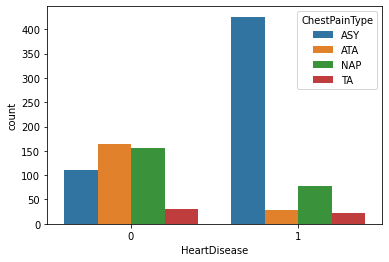

In [9]:
sns.countplot(x = 'HeartDisease', hue = 'ChestPainType', data = data_raw)
pass

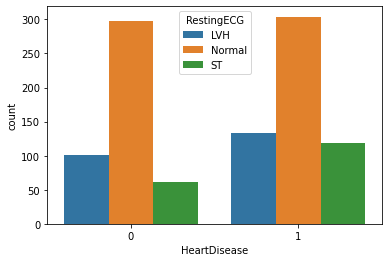

In [10]:
sns.countplot(x = 'HeartDisease', hue = 'RestingECG', data = data_raw)
pass

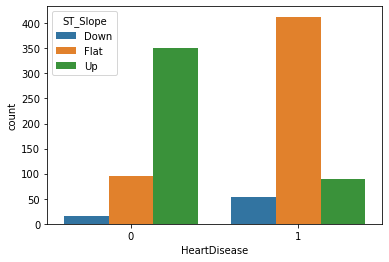

In [107]:
sns.countplot(x = 'HeartDisease', hue = 'ST_Slope', data = data_raw)
pass

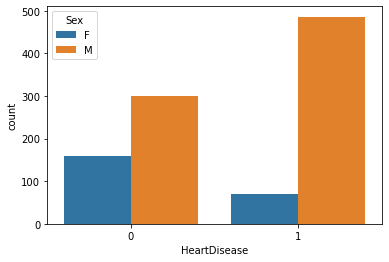

In [108]:
sns.countplot(x = 'HeartDisease', hue = 'Sex', data = data_raw)
pass

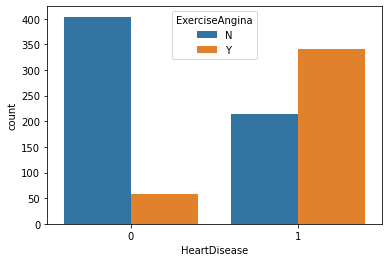

In [109]:
sns.countplot(x = 'HeartDisease', hue = 'ExerciseAngina', data = data_raw)
pass

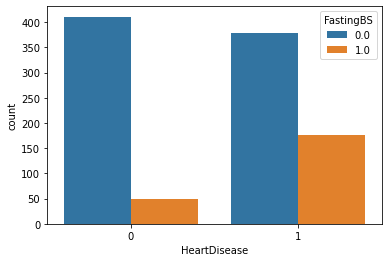

In [110]:
sns.countplot(x = 'HeartDisease', hue = 'FastingBS', data = data_raw)
pass

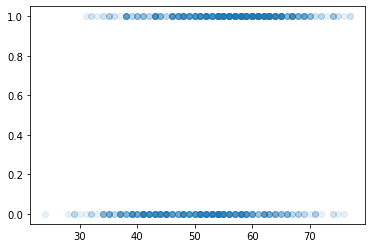

In [111]:
plt.scatter(data_raw['Age'], data_raw['HeartDisease'], alpha = 0.1)

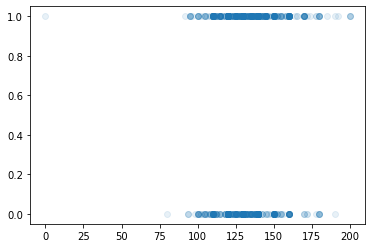

In [113]:
plt.scatter(data_raw['RestingBP'], data_raw['HeartDisease'], alpha = 0.1)

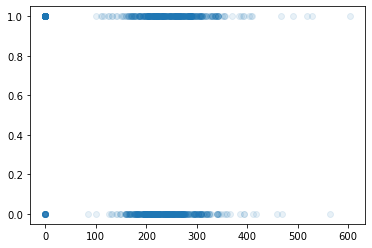

In [120]:
plt.scatter(data_raw['Cholesterol'], data_raw['HeartDisease'], alpha = 0.1)

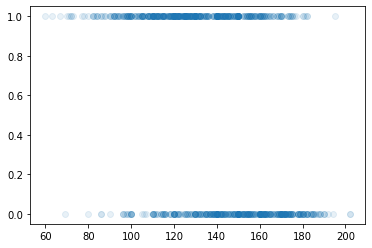

In [121]:
plt.scatter(data_raw['MaxHR'], data_raw['HeartDisease'], alpha = 0.1)

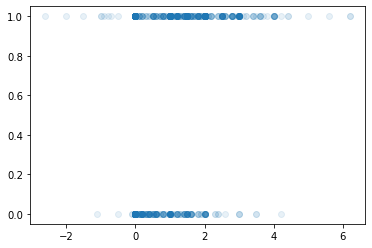

In [123]:
plt.scatter(data_raw['Oldpeak'], data_raw['HeartDisease'], alpha = 0.1)

### Матрица корреляции:

In [106]:
corr_mat = data_raw.corr()
corr_mat

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
Age,1.000000,-0.054444,0.256650,-0.079743,0.184629,-0.373830,0.209607,0.265561,0.299849,0.166762,-0.215902,-0.016607,0.036844,0.143150,-0.222071,0.128115,0.130592,0.197677,-0.266301
Sex,-0.054444,1.000000,0.004163,0.192666,-0.118733,0.177760,-0.171803,-0.074744,-0.260576,-0.166541,0.137392,0.074977,-0.009643,0.069388,-0.004604,-0.070597,-0.053272,-0.087519,0.115579
RestingBP,0.256650,0.004163,1.000000,0.098361,0.094519,-0.103956,0.140420,0.157261,0.108610,0.045648,-0.054139,-0.032240,0.053806,0.072102,-0.123967,0.080131,-0.017678,0.098878,-0.090809
Cholesterol,-0.079743,0.192666,0.098361,1.000000,-0.249662,0.246187,-0.032527,0.052245,-0.219963,-0.124465,0.142258,0.004306,0.021078,0.187029,-0.047779,-0.144738,-0.079944,-0.050272,0.091595
FastingBS,0.184629,-0.118733,0.094519,-0.249662,1.000000,-0.135445,0.077870,0.059583,0.250702,0.126193,-0.143367,-0.034359,0.033917,-0.011930,-0.090154,0.129261,0.087707,0.110321,-0.156192
MaxHR,-0.373830,0.177760,-0.103956,0.246187,-0.135445,1.000000,-0.374442,-0.158417,-0.408519,-0.365116,0.258879,0.136710,0.105816,0.138545,0.017866,-0.175805,-0.058722,-0.351940,0.385353
ExerciseAngina,0.209607,-0.171803,0.140420,-0.032527,0.077870,-0.374442,1.000000,0.385488,0.496362,0.437307,-0.299129,-0.170296,-0.133579,-0.017329,-0.069159,0.108177,0.108032,0.379209,-0.438073
Oldpeak,0.265561,-0.074744,0.157261,0.052245,0.059583,-0.158417,0.385488,1.000000,0.406686,0.289048,-0.261765,-0.109374,0.018464,0.105326,-0.131495,0.053182,0.334729,0.269632,-0.443224
HeartDisease,0.299849,-0.260576,0.108610,-0.219963,0.250702,-0.408519,0.496362,0.406686,1.000000,0.524628,-0.387910,-0.233911,-0.053005,0.023867,-0.103159,0.106531,0.122649,0.533143,-0.600969
ASY,0.166762,-0.166541,0.045648,-0.124465,0.126193,-0.365116,0.437307,0.289048,0.524628,1.000000,-0.511596,-0.579699,-0.248702,0.004656,-0.070494,0.085649,0.100318,0.293893,-0.347988


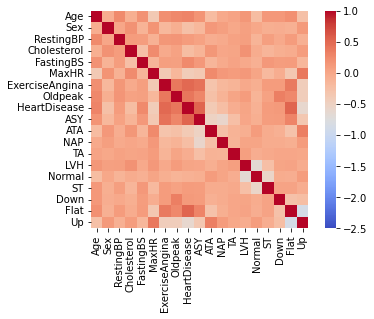

In [99]:
sns.heatmap(corr_mat, square=True, vmin = -2.5, vmax = 1, cmap ='coolwarm')
pass

# 3. Обработка пропущенных значений

In [12]:
data_raw.isna().sum()

Age               3
Sex               3
ChestPainType     3
RestingBP         4
Cholesterol       5
FastingBS         3
RestingECG        4
MaxHR             0
ExerciseAngina    2
Oldpeak           1
ST_Slope          1
HeartDisease      0
dtype: int64

### Заполняем пропуски в столбцах с категориальными признаками модой, а с числовыми - медианой

In [13]:
data_raw['Age'].fillna(data_raw['Age'].median(axis = 0), axis = 0, inplace = True)
data_raw['RestingBP'].fillna(data_raw['RestingBP'].median(axis = 0), axis = 0, inplace = True)
data_raw['Cholesterol'].fillna(data_raw['Cholesterol'].median(axis = 0), axis = 0, inplace = True)
data_raw['MaxHR'].fillna(data_raw['MaxHR'].median(axis = 0), axis = 0, inplace = True)
data_raw['Oldpeak'].fillna(data_raw['Oldpeak'].median(axis = 0), axis = 0, inplace = True)

In [14]:
data_raw.fillna(data_raw.mode().iloc[0], inplace = True)

In [15]:
data_raw.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# 4. Обработка признаков, содержащих категориальные значения

Обработка бинарных признаков:

In [16]:
data_raw['Sex'] = pd.factorize(data_raw['Sex'])[0]
data_raw['ExerciseAngina'] = pd.factorize(data_raw['ExerciseAngina'])[0]
data_raw['HeartDisease'] = pd.factorize(data_raw['HeartDisease'])[0]
data_raw['FastingBS'] = pd.factorize(data_raw['FastingBS'])[0]

Обработка категориальныч признаков:

In [17]:
ChestPainType_dummies = pd.get_dummies(data_raw['ChestPainType'])
data_raw = pd.concat((data_raw, ChestPainType_dummies), axis = 1)
data_raw = data_raw.drop(['ChestPainType'], axis = 1)
RestingECG_dummies = pd.get_dummies(data_raw['RestingECG'])
data_raw = pd.concat((data_raw, RestingECG_dummies), axis = 1)
data_raw = data_raw.drop(['RestingECG'], axis = 1)
ST_Slope_dummies = pd.get_dummies(data_raw['ST_Slope'])
data_raw = pd.concat((data_raw, ST_Slope_dummies), axis = 1)
data_raw = data_raw.drop(['ST_Slope'], axis = 1)

In [18]:
data_raw

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40.0,0,140.0,289.0,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49.0,1,160.0,180.0,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37.0,0,130.0,283.0,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48.0,1,138.0,214.0,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54.0,0,150.0,195.0,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,49.0,0,110.0,264.0,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
1015,68.0,0,149.0,193.0,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
1016,57.0,1,130.0,131.0,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
1017,64.0,1,130.0,236.0,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


# 5. Нормализация количественных признаков

In [20]:
data_raw['Age'] = (data_raw['Age'] - data_raw['Age'].mean(axis=0))/data_raw['Age'].std(axis=0)
data_raw['RestingBP'] = (data_raw['RestingBP'] - data_raw['RestingBP'].mean(axis=0))/data_raw['RestingBP'].std(axis=0)
data_raw['Cholesterol'] = (data_raw['Cholesterol'] - data_raw['Cholesterol'].mean(axis=0))/data_raw['Cholesterol'].std(axis=0)
data_raw['MaxHR'] = (data_raw['MaxHR'] - data_raw['MaxHR'].mean(axis=0))/data_raw['MaxHR'].std(axis=0)
data_raw['Oldpeak'] = (data_raw['Oldpeak'] - data_raw['Oldpeak'].mean(axis=0))/data_raw['Oldpeak'].std(axis=0)
data_raw.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
count,1.019000e+03,1019.000000,1.019000e+03,1.019000e+03,1019.000000,1.019000e+03,1019.000000,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,1.917559e-17,0.224730,-6.498999e-17,2.293444e-16,0.222767,-6.842199e-17,0.391560,-6.354093e-16,0.546614,0.529931,0.188420,0.229637,0.052012,0.229637,0.593719,0.176644,0.068695,0.500491,0.430815
std,1.000000e+00,0.417609,1.000000e+00,1.000000e+00,0.416308,1.000000e+00,0.488339,1.000000e+00,0.498067,0.499348,0.391239,0.420806,0.222160,0.420806,0.491379,0.381554,0.253059,0.500245,0.495433
min,-3.128900e+00,0.000000,-7.257237e+00,-1.921162e+00,0.000000,-3.079004e+00,0.000000,-3.236991e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.922961e-01,0.000000,-6.840365e-01,-2.195277e-01,0.000000,-7.208641e-01,0.000000,-8.384890e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.927892e-02,0.000000,-1.362697e-01,1.964273e-01,0.000000,6.518247e-02,0.000000,-2.849885e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.849146e-01,0.000000,4.114970e-01,6.076555e-01,0.000000,7.726244e-01,1.000000,5.452623e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.485883e+00,1.000000,3.698097e+00,3.779312e+00,1.000000,2.501927e+00,1.000000,4.881016e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Разбивка данных на учебную и тестовую выборки

In [21]:
y = data_raw['HeartDisease']
X = data_raw.drop(['HeartDisease'], axis = 1)
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)
X_train.shape, X_test.shape

((764, 18), (255, 18))

# 7. Классификатор ближайших соседей

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier (n_neighbors = 7, p = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

# 8. Вычисление ошибки на обучающей и тестовой выборках

In [23]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Вычисление ошибки на обучающей выборке:

In [24]:
np.mean(y_train != y_train_pred)

0.1099476439790576

Вычисление ошибки на тестовой выборке:

In [25]:
np.mean(y_test != y_test_pred)

0.13725490196078433

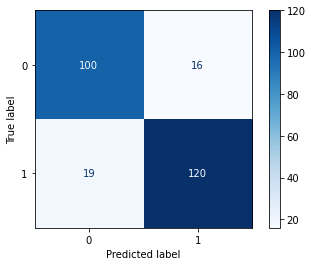

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)
pass

100 пациентов из тестовой выборки предположительно не имели сердечных заболеваний и дествительно их не имели; 120 пациентов из тестовой выборки предположительно имели сердечные заболевания и действительно их имели; 16 пациентов из тестовой выборки предположительно имели сердечные заболевания, но на самом деле таковых не имели; 19 пациентов предположительно не имели сердечных заболеваний, но на самом деле они были.

# 9. Обучение нейронной сети

In [28]:
from sklearn.neural_network import MLPClassifier 
model = MLPClassifier(hidden_layer_sizes = (30, ), random_state = 42, max_iter = 2000)
model.fit (X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Вычисление ошибки на тренировочной выборке:

In [29]:
np.mean(y_train != y_train_pred)

0.02225130890052356

Вычисление ошибки на тестовой выборке: 

In [31]:
np.mean(y_test != y_test_pred)

0.17254901960784313

Наблюдается переобучение - ошибка на тестовой выборке в разы больше ошибки на тренировочной

Построим графики зависимости ошибки от параметра регуляризации alpha:


In [95]:
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (30, ), random_state = 42, alpha = alpha, max_iter = 2000)
    mlp_model.fit (X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

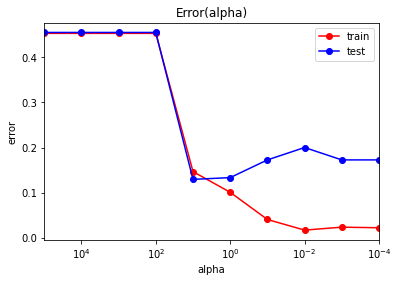

In [45]:
plt.semilogx(alpha_arr, train_err, 'r-o',label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o',label = 'test')
plt.xlim ([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error(alpha)')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Вычислим минимально возможную ошибку:

In [99]:
min_test_err = np.min(test_err)
min_test_err

0.12941176470588237

Вычислим alpha для минимальной ошибки на тестовой выборке:

In [101]:
alpha_opt = []
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt

array([10.])

Рассмотрим график зависимости ошибки от числа нейронов при таком alpha:

In [102]:
test_err = []
train_err = []
neiro_arr = list(range(10, 400, 10))
for neiro in neiro_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neiro, ), random_state = 42, alpha = 10, max_iter = 2000)
    mlp_model.fit (X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

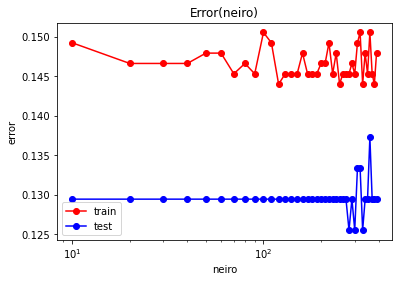

In [103]:
plt.semilogx(neiro_arr, train_err, 'r-o',label = 'train')
plt.semilogx(neiro_arr, test_err, 'b-o',label = 'test')
plt.title('Error(neiro)')
plt.xlabel('neiro')
plt.ylabel('error')
plt.legend()
pass

Вычислим ошибки на тестовой и тренировочной с учетом измения параметров:

In [104]:
from sklearn.neural_network import MLPClassifier 
model = MLPClassifier(hidden_layer_sizes = (30, ), random_state = 42, alpha = 10, max_iter = 2000)
model.fit (X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.14659685863874344, 0.12941176470588237)

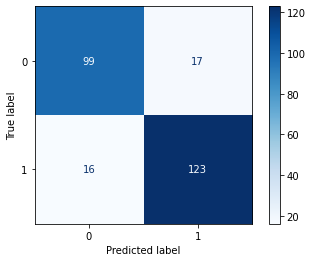

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)
pass

99 пациентов из тестовой выборки предположительно не имели сердечных заболеваний и дествительно их не имели; 123 пациентов из тестовой выборки предположительно имели сердечные заболевания и действительно их имели; 17 пациентов из тестовой выборки предположительно имели сердечные заболевания, но на самом деле таковых не имели; 16 пациентов предположительно не имели сердечных заболеваний, но на самом деле они были.